# Stats - normalised, annual

$$
z = \frac{1}{30} \displaystyle\sum_{y=1}^{30}
\left(\frac{\bar{x}_y - \bar{x}_{hist}}{\sigma_{hist}}\right)
$$

- calculate annual means (or seasonal means for each year)
- calculate the historical mean and standard deviation from the annual means
- normalise
- interannual reduction
- ensemble reduction

In [1]:
import importlib
import climag.climag as cplt
import geopandas as gpd
import os
import numpy as np

In [2]:
# mask for offshore areas
ie_bbox = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="ne_10m_land_2157_IE_BBOX_DIFF",
)
# mask for non-pasture areas
mask = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE",
)

In [13]:
def describe_dataset(dataset, model=False):
    dataset_df = dataset.to_dataframe()[list(dataset.data_vars)]
    dataset_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # dataset_df.dropna(subset=list(dataset.data_vars), inplace=True)
    if model:
        return dataset_df.groupby("model").describe().T
    else:
        return dataset_df.describe()

In [15]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [4]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [5]:
ds_ec_norm = cplt.calc_normalised_std(ds_ec, skipna=True)

In [6]:
# get interannual mean, and then the ensemble mean
ds_ec_norm_reduced = ds_ec_norm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

In [7]:
describe_dataset(ds_ec_norm_reduced)

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


bm           gro          bm_c
count  2.295000e+03  2.031000e+03  2.031000e+03
mean  -6.033933e-01  1.387780e-01  2.080070e-01
std    5.441306e-01  3.153881e-01  3.762085e-01
min   -2.406495e+00 -1.659047e+00 -2.377586e+00
25%   -1.053986e+00 -2.806385e-07 -3.973639e-09
50%   -7.030933e-01  4.718701e-07  1.790288e-01
75%   -1.432995e-07  3.464230e-01  4.442894e-01
max    1.043081e-06  1.313053e+00  1.169912e+00

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/mnt/Backup/Documents/Git/ClimAg/Clim

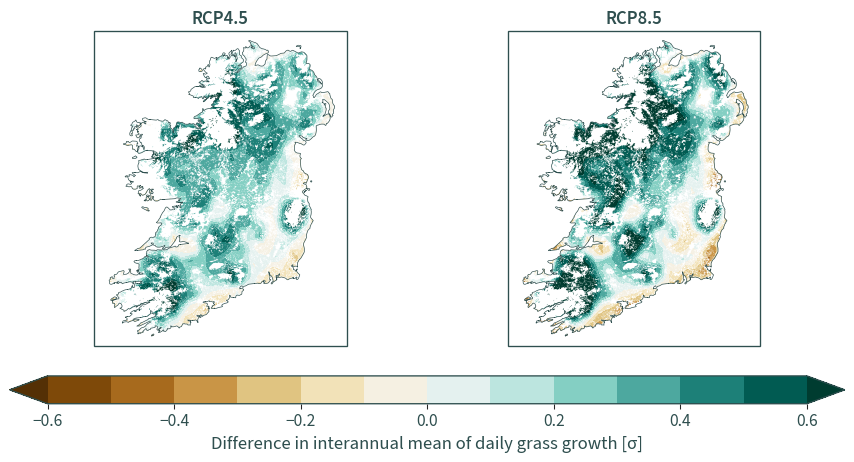

In [8]:
cplt.plot_stats(ds_ec_norm_reduced.sel(exp=["rcp45", "rcp85"])["gro"], cplt.projection_eurocordex, mask, ie_bbox, label="Difference in interannual mean of daily grass growth [σ]", levels=np.arange(-0.6, 0.6 + 0.1, 0.1))

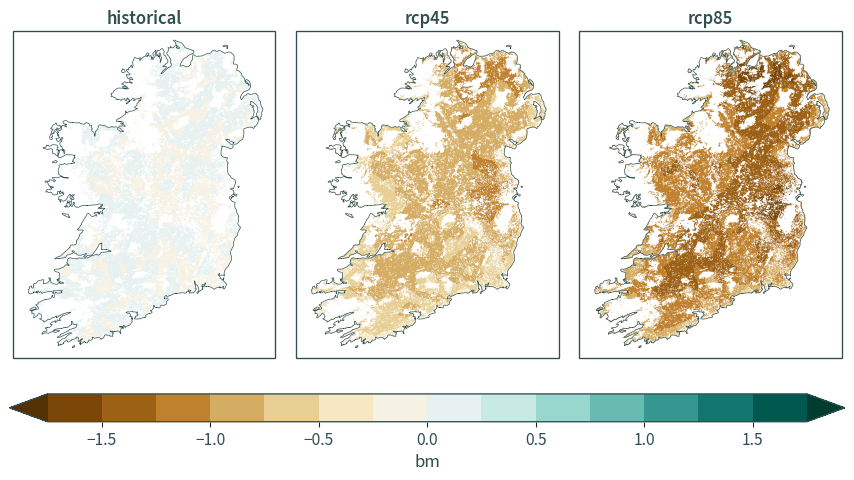

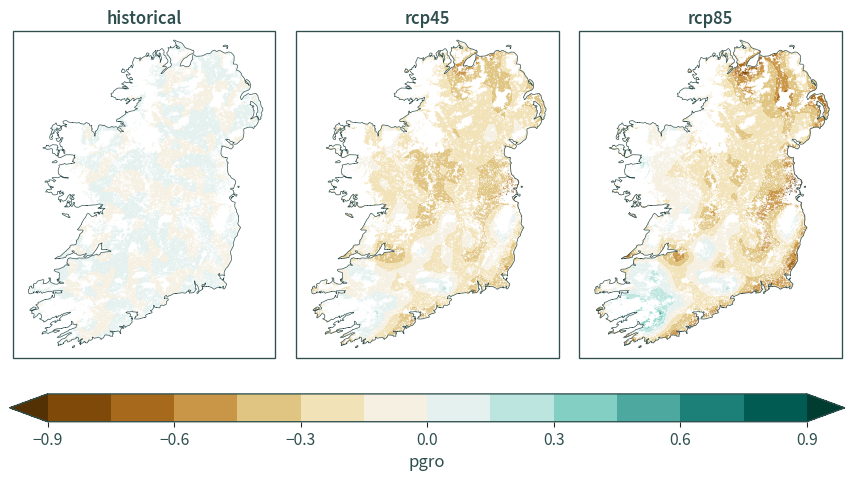

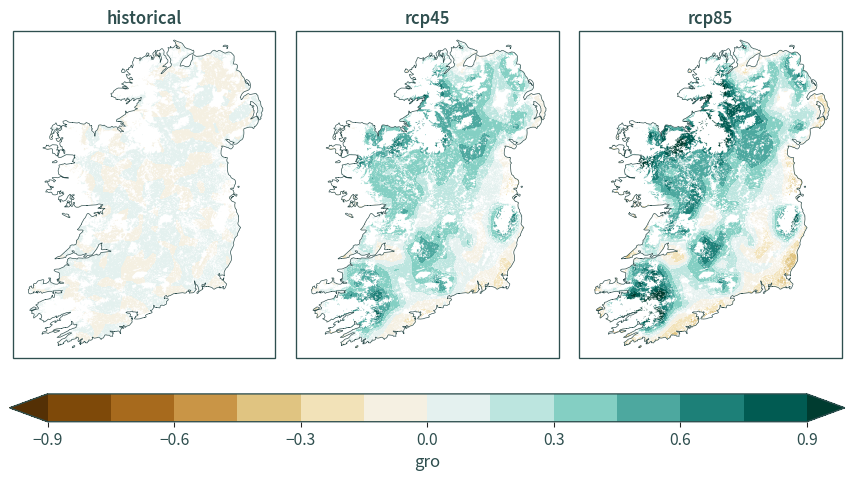

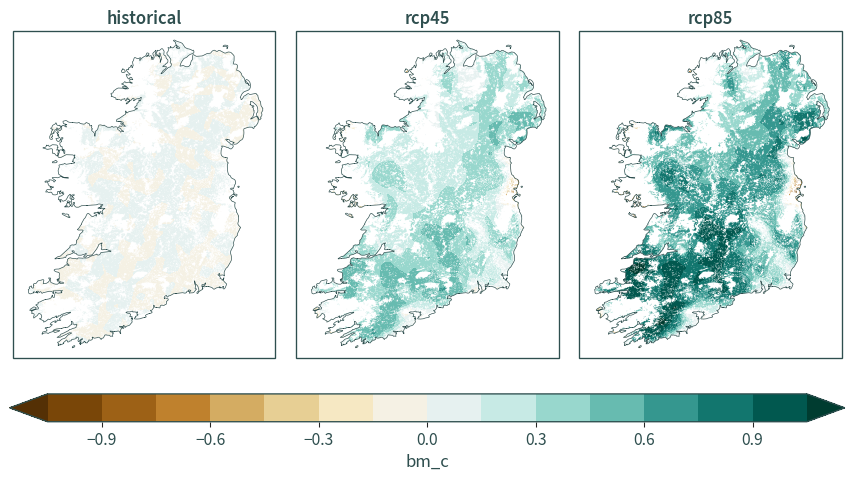

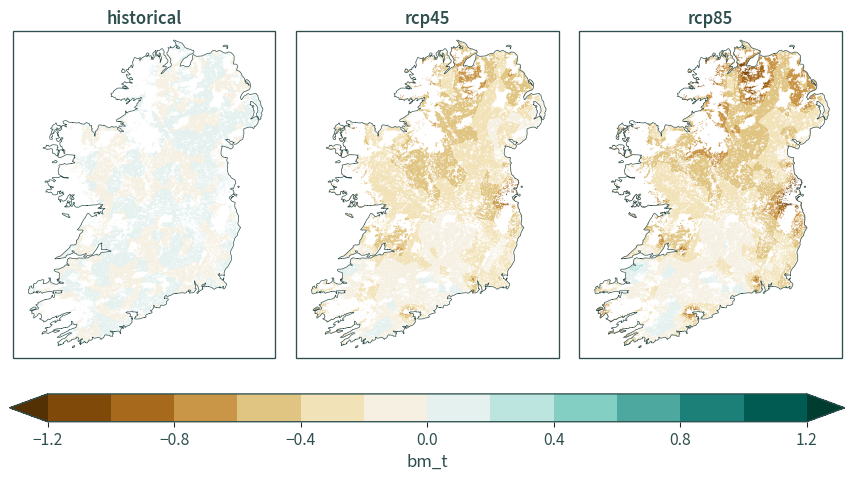

In [8]:
cplt.plot_stats(ds_ec_norm_reduced, cplt.projection_eurocordex, mask, ie_bbox)

## HiResIreland

In [14]:
ds_hr = cplt.load_all_data("HiResIreland")

In [15]:
ds_hr_norm = cplt.calc_normalised_std(ds_hr, skipna=True)

In [16]:
ds_hr_norm_reduced = ds_hr_norm.mean(dim="year", skipna=True).mean(
    dim="model", skipna=True
)

In [17]:
describe_dataset(ds_hr_norm_reduced)

bm           gro          bm_c
count  1.835400e+04  1.787100e+04  1.787100e+04
mean  -6.654141e-01 -1.742191e-01 -1.847842e-01
std    5.427951e-01  2.052259e-01  2.541005e-01
min   -2.199664e+00 -1.359309e+00 -1.730923e+00
25%   -1.092937e+00 -2.933193e-01 -3.003712e-01
50%   -7.799212e-01 -1.482282e-01 -1.194008e-01
75%   -1.233071e-07 -5.488594e-08 -2.682209e-08
max    1.082818e-06  5.266454e-01  5.884098e-01

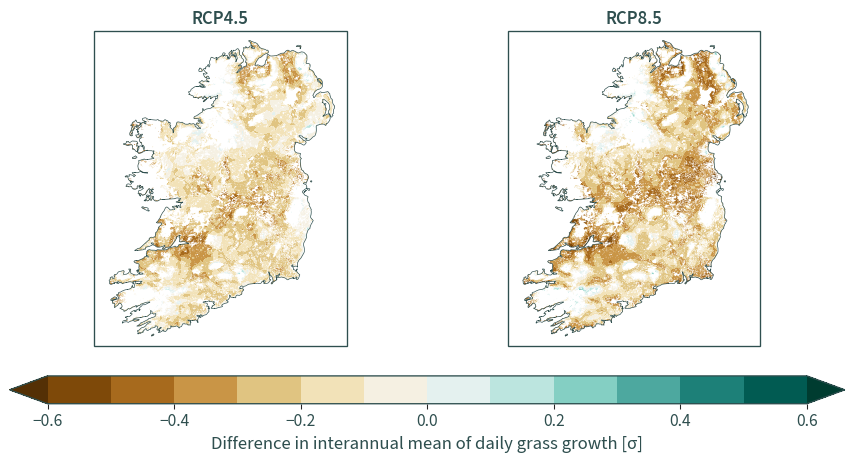

In [18]:
cplt.plot_stats(ds_hr_norm_reduced.sel(exp=["rcp45", "rcp85"])["gro"], cplt.projection_hiresireland, mask, ie_bbox, label="Difference in interannual mean of daily grass growth [σ]", levels=np.arange(-0.6, 0.6 + 0.1, 0.1))

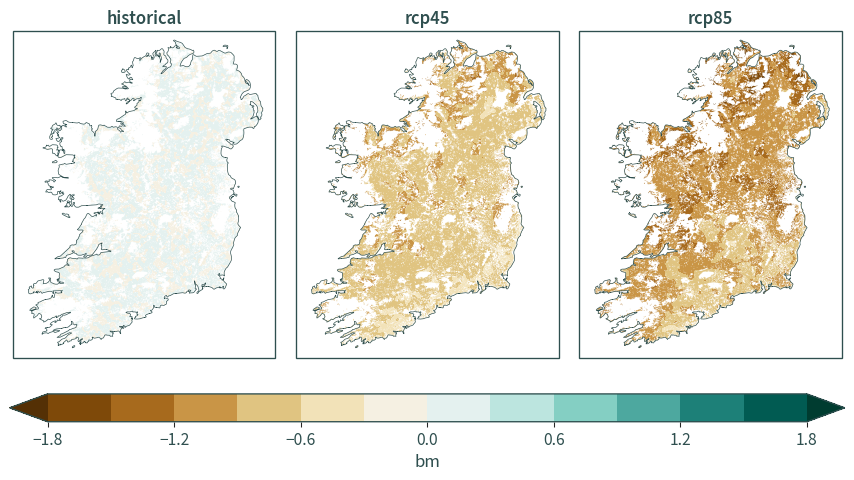

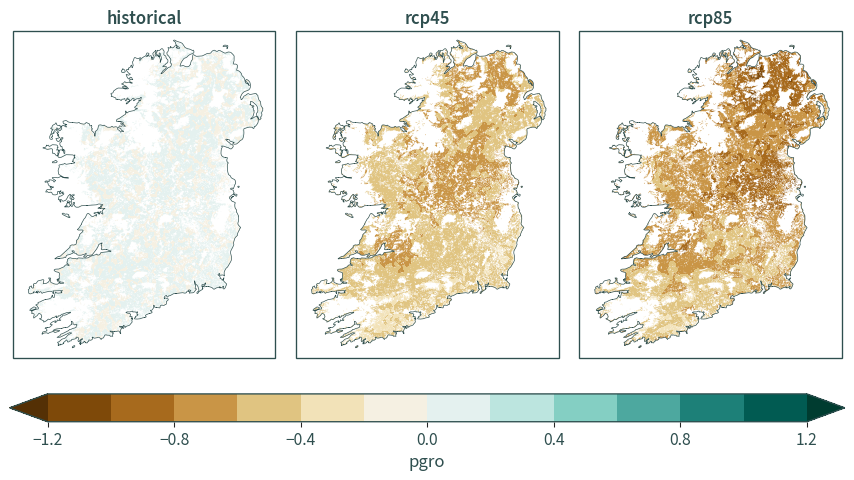

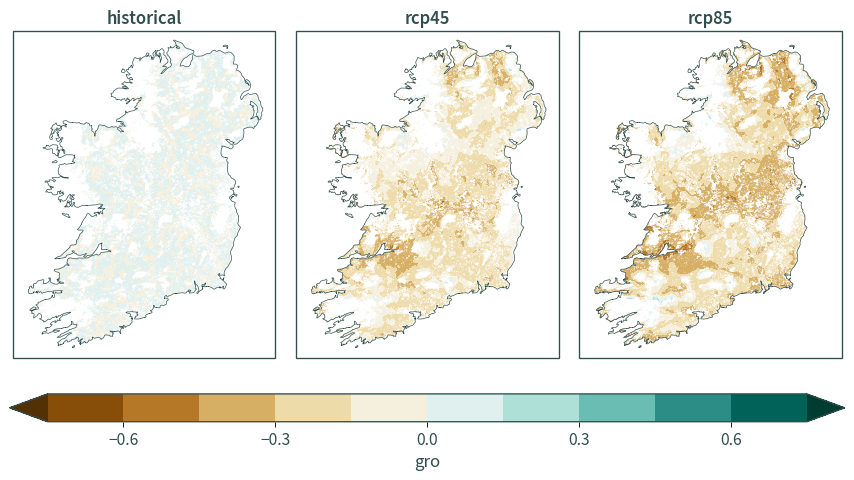

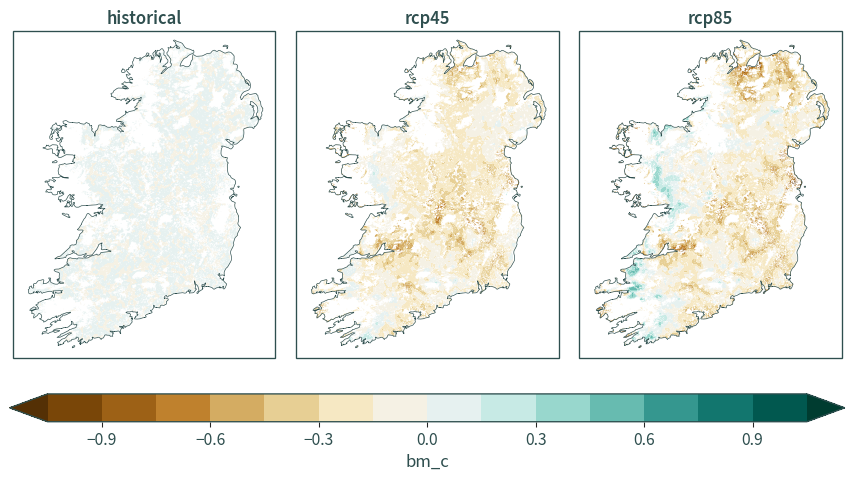

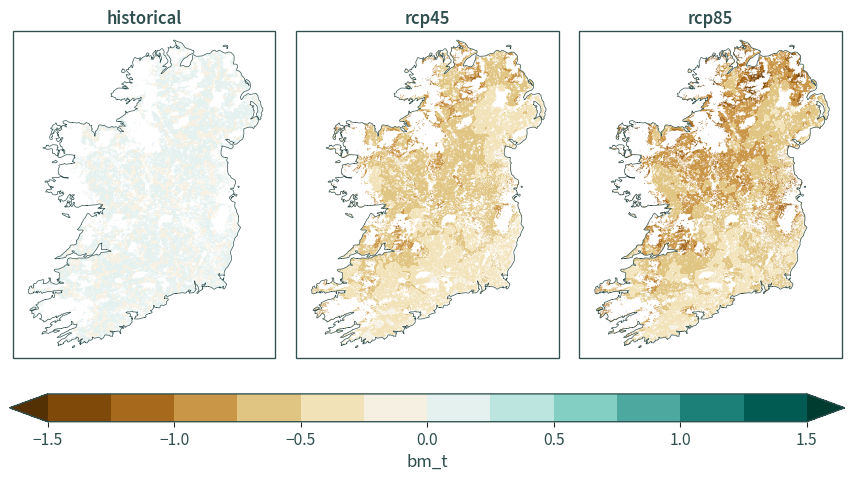

In [8]:
cplt.plot_stats(ds_hr_norm_reduced, cplt.projection_hiresireland, mask, ie_bbox)